In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from transformers import pipeline
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
# Data Source: 
# https://www.kaggle.com/datasets/thedevastator/netflix-imdb-scores?resource=download
df = pd.read_csv("Netflix TV Shows and Movies.csv")
df.drop(["id", "imdb_id"], axis=1, inplace=True)
df.head()

,index,title,type,description,release_year,age_certification,runtime,imdb_score,imdb_votes
0,0,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,8.3,795222.0
1,1,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,8.2,530877.0
2,2,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,8.0,392419.0
3,3,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,8.1,391942.0
4,4,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,8.8,72895.0


## Do movies on Netflix with an older release years have a better average IMDb ratings?

In [3]:
movies_df = df[df["type"] == "MOVIE"]
movies_df_mean = movies_df.groupby("release_year")["imdb_score"].mean()

r, p = pearsonr(movies_df_mean.index, movies_df_mean)
print(f"Movies on Netflix with a more recent release year on average have worse ratings on IMDb, r = {r:.2f}, p = {p:.4f}.")

Movies on Netflix with a more recent release year on average have worse ratings on IMDb, r = -0.43, p = 0.0003.


## Do shows on Netflix with an older release years have a better average IMDb ratings?

In [4]:
shows_df = df[df["type"] == "SHOW"]
shows_df_mean = shows_df.groupby("release_year")["imdb_score"].mean()

r, p = pearsonr(shows_df_mean.index, shows_df_mean)
print(f"No relationship between the release year and the IMDb ratings  were found for Netflix shows, r = {r:.2f}, p = {p:.4f}.")

No relationship between the release year and the IMDb ratings  were found for Netflix shows, r = 0.01, p = 0.9563.


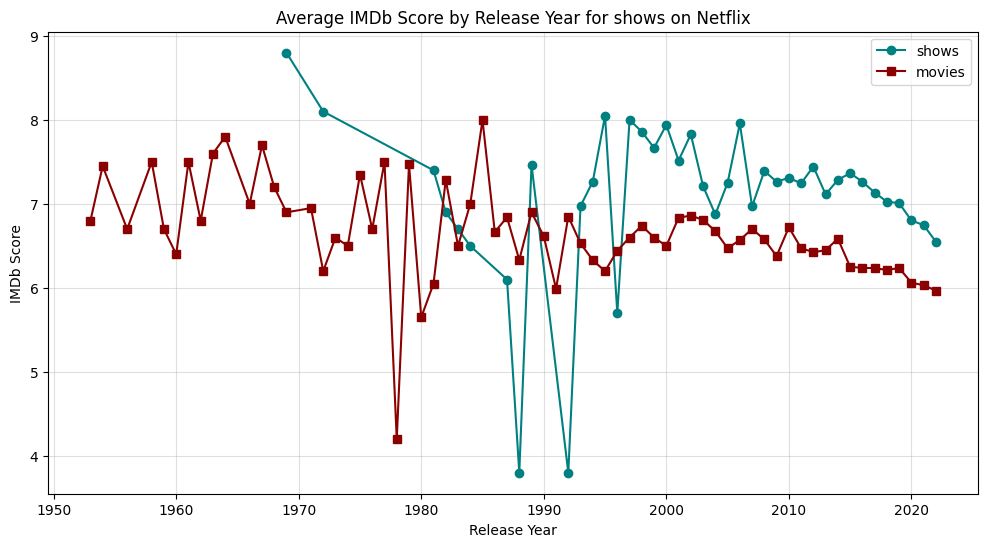

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(
    shows_df_mean.index,
    shows_df_mean,
    color="teal",
    marker="o",
    label="shows"
)

plt.plot(
    movies_df_mean.index,
    movies_df_mean,
    color="darkred",
    marker="s",
    label="movies"
)

plt.xlabel("Release Year")
plt.ylabel("IMDb Score")
plt.title("Average IMDb Score by Release Year for shows on Netflix")
plt.grid(True, alpha=.4)
plt.legend()
#1978 only one movie "Bandie"

## Q2: Do movies (a) or shows (b) on Netflix with a more positive description get better IMDb ratings?

In [6]:
#BERT model (used because it performed the best in A3)
sentiment_pipeline = pipeline(model=f"cardiffnlp/twitter-roberta-base-sentiment-latest")

movies_df = movies_df[movies_df["description"].str.strip() != ""]  
movies_class = sentiment_pipeline(movies_df["description"].to_list())
movies_df["Bert_class"] = [result["label"] for result in movies_class]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
C:\Users\danie\AppData\Local\Temp\ipykernel_25800\3914028994.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [11]:
#BERT model (used because it performed the best in A3)
sentiment_pipeline = pipeline(model=f"cardiffnlp/twitter-roberta-base-sentiment-latest")

shows_df = shows_df.dropna(subset=["description"]) 
shows_class = sentiment_pipeline(shows_df["description"].to_list())
shows_df["Bert_class"] = [result["label"] for result in shows_class]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
C:\Users\danie\AppData\Local\Temp\ipykernel_25800\3968437651.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

One-way ANOVA Results:
F-statistic: 20.50
p-value: 0.000

The p-value (0.000) is less than 0.05.
There is a statistically significant difference in IMDB scores across sentiment categories.

Summary Statistics:
            count      mean  median       std  min  max
Bert_class                                             
negative      842  6.079572     6.2  1.144967  1.5  8.7
neutral      2036  6.294646     6.4  1.084347  1.7  9.0
positive      529  6.458790     6.6  1.156259  2.1  9.0
Tukey's HSD Pairwise Comparisons:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1   group2  meandiff p-adj lower  upper  reject
-----------------------------------------------------
negative  neutral   0.2151   0.0 0.1083 0.3218   True
negative positive   0.3792   0.0 0.2347 0.5237   True
 neutral positive   0.1641 0.007  0.037 0.2913   True
-----------------------------------------------------


<Figure size 1000x600 with 0 Axes>

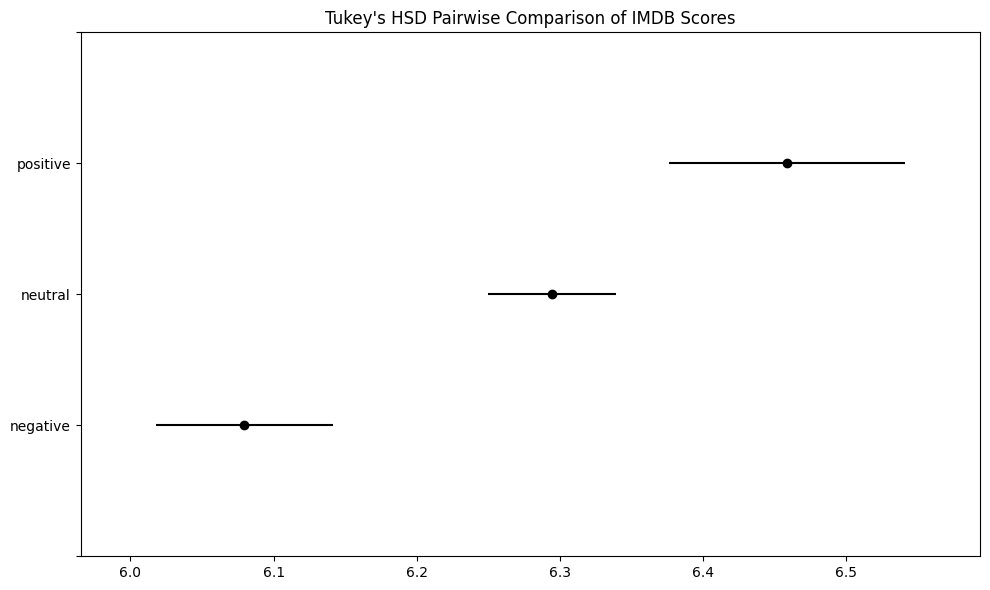

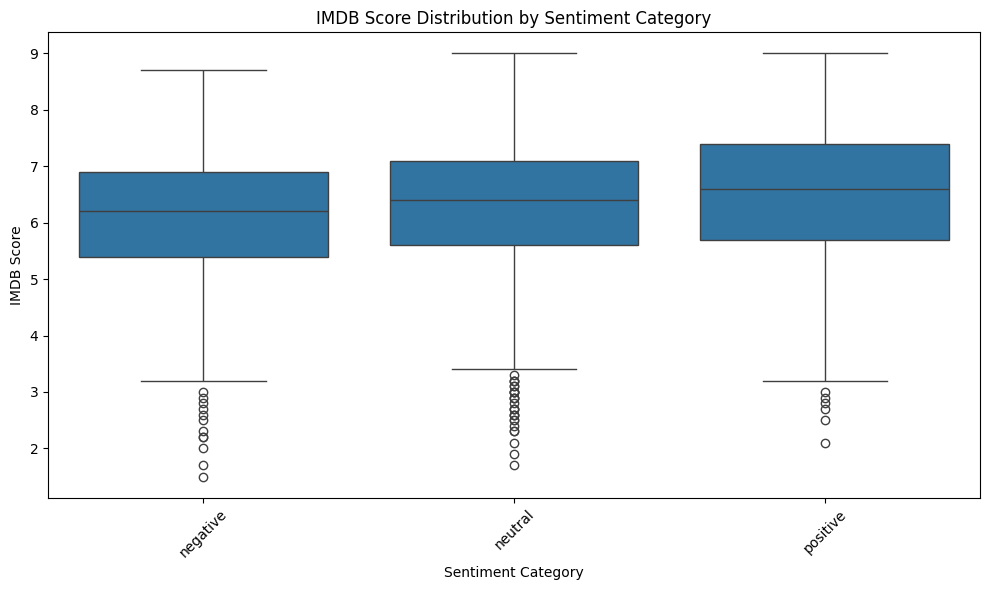

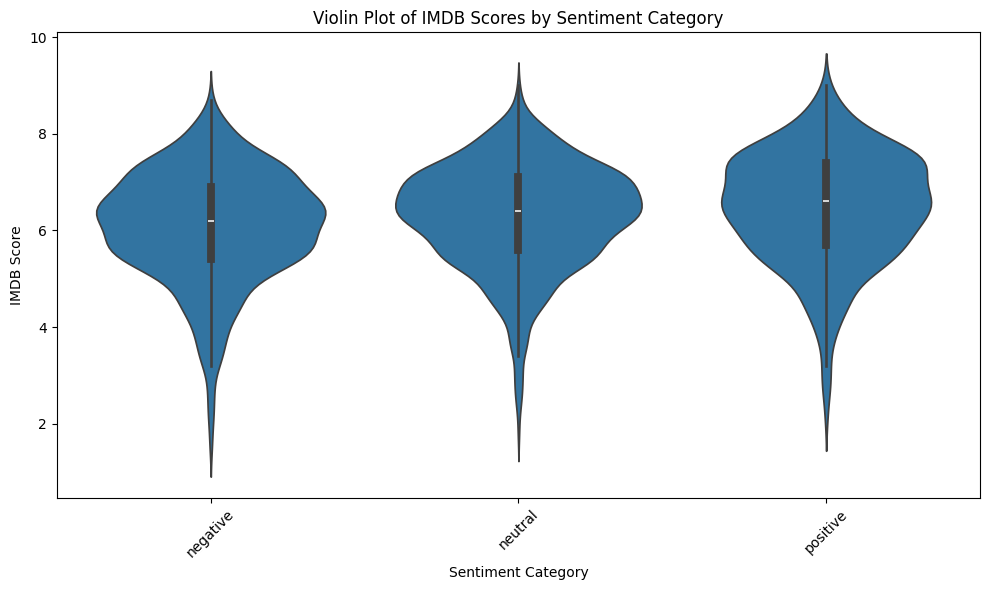

In [8]:
# One-way ANOVA
# Group the data by sentiment category
sentiment_groups = [group['imdb_score'].values for name, group in movies_df.groupby('Bert_class', observed=False)]

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(*sentiment_groups)

# Print ANOVA results
print("One-way ANOVA Results:")
print(f"F-statistic: {f_statistic:.2f}")
print(f"p-value: {p_value:.3f}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print(f"\nThe p-value ({p_value:.3f}) is less than {alpha}.")
    print("There is a statistically significant difference in IMDB scores across sentiment categories.")
else:
    print(f"\nThe p-value ({p_value:.3f}) is greater than {alpha}.")
    print("There is no statistically significant difference in IMDB scores across sentiment categories.")


# Perform Tukey's HSD Test for pairwise comparisons
tukey_results = pairwise_tukeyhsd(
    endog=movies_df['imdb_score'],  # dependent variable
    groups=movies_df['Bert_class'],  # grouping variable
    alpha=0.05  # significance level
)

# Summary statistics
summary_stats = movies_df.groupby('Bert_class', observed=False)['imdb_score'].agg([
    ('count', 'count'),
    ('mean', 'mean'),
    ('median', 'median'),
    ('std', 'std'),
    ('min', 'min'),
    ('max', 'max')
])
print("\nSummary Statistics:")
print(summary_stats)

# Print Tukey's HSD results
print("Tukey's HSD Pairwise Comparisons:")
print(tukey_results)

# Visualization of Tukey's HSD results
plt.figure(figsize=(10, 6))
tukey_results.plot_simultaneous()
plt.title("Tukey's HSD Pairwise Comparison of IMDB Scores")
plt.tight_layout()

# Visualization of distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='Bert_class', y='imdb_score', data=movies_df)
plt.title('IMDB Score Distribution by Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('IMDB Score')
plt.xticks(rotation=45)
plt.tight_layout()

# Additional diagnostic plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Bert_class', y='imdb_score', data=movies_df)
plt.title('Violin Plot of IMDB Scores by Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('IMDB Score')
plt.xticks(rotation=45)
plt.tight_layout()

One-way ANOVA Results:
F-statistic: 4.01
p-value: 0.018

The p-value (0.018) is less than 0.05.
There is a statistically significant difference in IMDB scores across sentiment categories.

Summary Statistics:
            count      mean  median       std  min  max
Bert_class                                             
negative      363  7.047107     7.2  0.986629  2.3  9.5
neutral      1114  7.056732     7.2  1.056097  1.6  9.6
positive      398  6.882161     7.0  1.210890  2.3  9.6
Tukey's HSD Pairwise Comparisons:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower   upper  reject
--------------------------------------------------------
negative  neutral   0.0096  0.988 -0.1432  0.1625  False
negative positive  -0.1649 0.0885 -0.3485  0.0186  False
 neutral positive  -0.1746 0.0155 -0.3222 -0.0269   True
--------------------------------------------------------


<Figure size 1000x600 with 0 Axes>

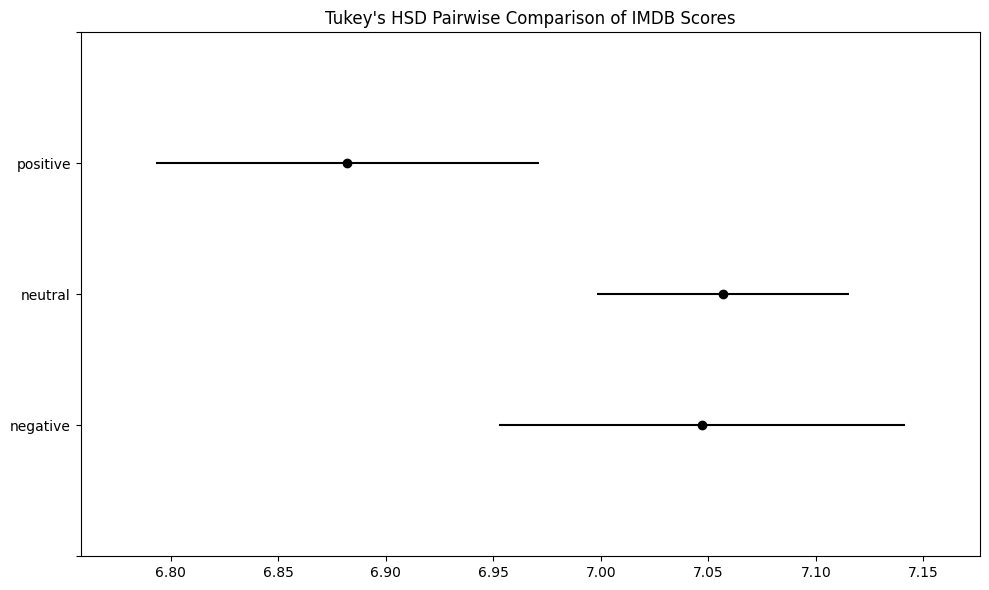

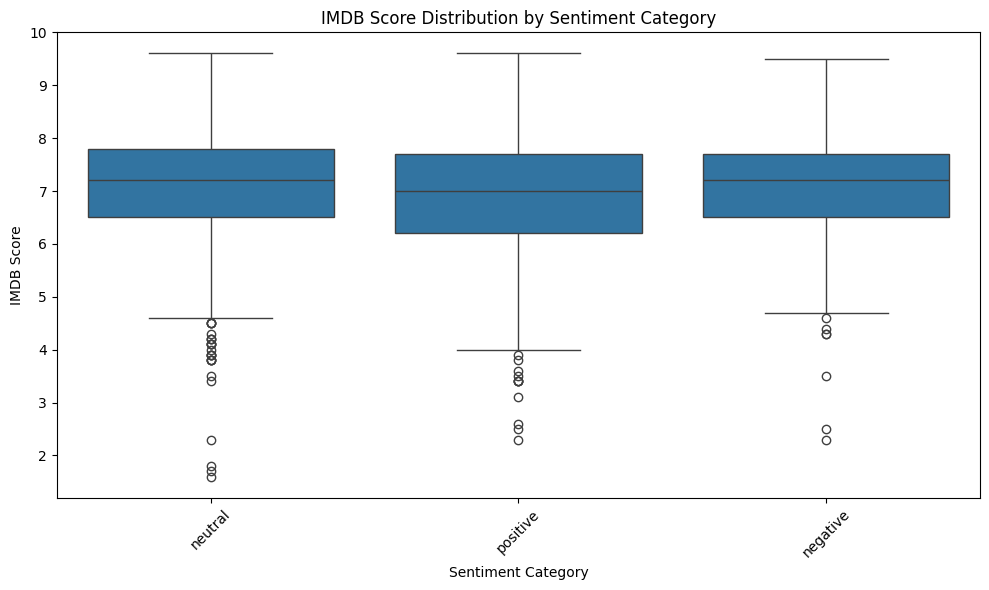

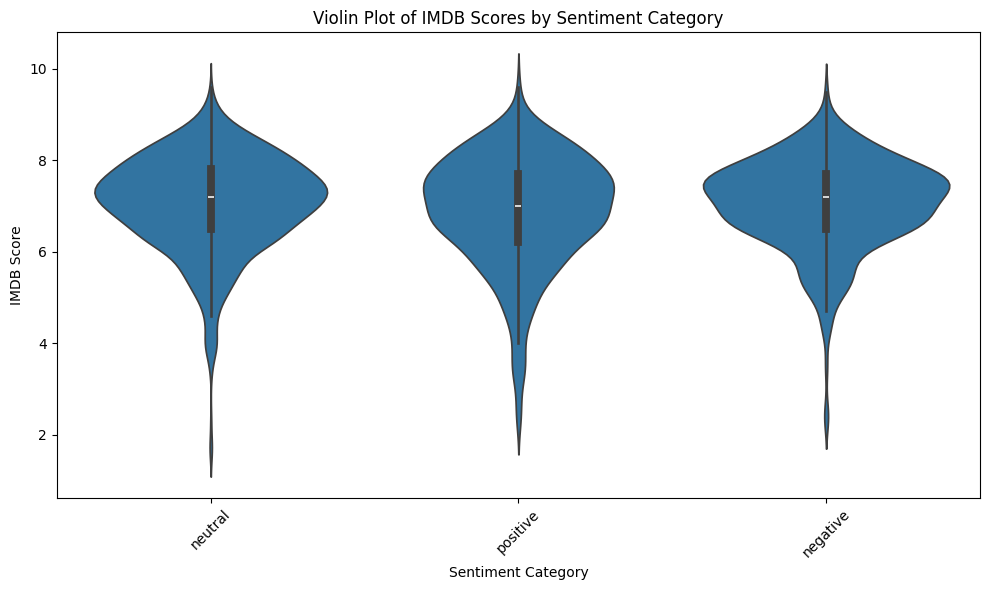

In [13]:
# One-way ANOVA
# Group the data by sentiment category
sentiment_groups = [group['imdb_score'].values for name, group in shows_df.groupby('Bert_class', observed=False)]

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(*sentiment_groups)

# Print ANOVA results
print("One-way ANOVA Results:")
print(f"F-statistic: {f_statistic:.2f}")
print(f"p-value: {p_value:.3f}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print(f"\nThe p-value ({p_value:.3f}) is less than {alpha}.")
    print("There is a statistically significant difference in IMDB scores across sentiment categories.")
else:
    print(f"\nThe p-value ({p_value:.3f}) is greater than {alpha}.")
    print("There is no statistically significant difference in IMDB scores across sentiment categories.")


# Perform Tukey's HSD Test for pairwise comparisons
tukey_results = pairwise_tukeyhsd(
    endog=shows_df['imdb_score'],  # dependent variable
    groups=shows_df['Bert_class'],  # grouping variable
    alpha=0.05  # significance level
)

# Summary statistics
summary_stats = shows_df.groupby('Bert_class', observed=False)['imdb_score'].agg([
    ('count', 'count'),
    ('mean', 'mean'),
    ('median', 'median'),
    ('std', 'std'),
    ('min', 'min'),
    ('max', 'max')
])
print("\nSummary Statistics:")
print(summary_stats)

# Print Tukey's HSD results
print("Tukey's HSD Pairwise Comparisons:")
print(tukey_results)

# Visualization of Tukey's HSD results
plt.figure(figsize=(10, 6))
tukey_results.plot_simultaneous()
plt.title("Tukey's HSD Pairwise Comparison of IMDB Scores")
plt.tight_layout()

# Visualization of distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='Bert_class', y='imdb_score', data=shows_df)
plt.title('IMDB Score Distribution by Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('IMDB Score')
plt.xticks(rotation=45)
plt.tight_layout()

# Additional diagnostic plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Bert_class', y='imdb_score', data=shows_df)
plt.title('Violin Plot of IMDB Scores by Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('IMDB Score')
plt.xticks(rotation=45)
plt.tight_layout()